In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_3265/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/crspcompustat-merged/fundamentals-quarterly/
df = pd.read_csv("permno_sic.csv")
# Select only the LPERMNO, sic, and datadate columns
df = df[['LPERMNO', 'sic', 'datadate']]

# Ensure datadate is in YYYY-MM-DD format
df['datadate'] = pd.to_datetime(df['datadate'])#.dt.strftime('%Y-%m-%d')

In [3]:
df = df[df['datadate'].dt.month.isin([3, 6, 9, 12])]

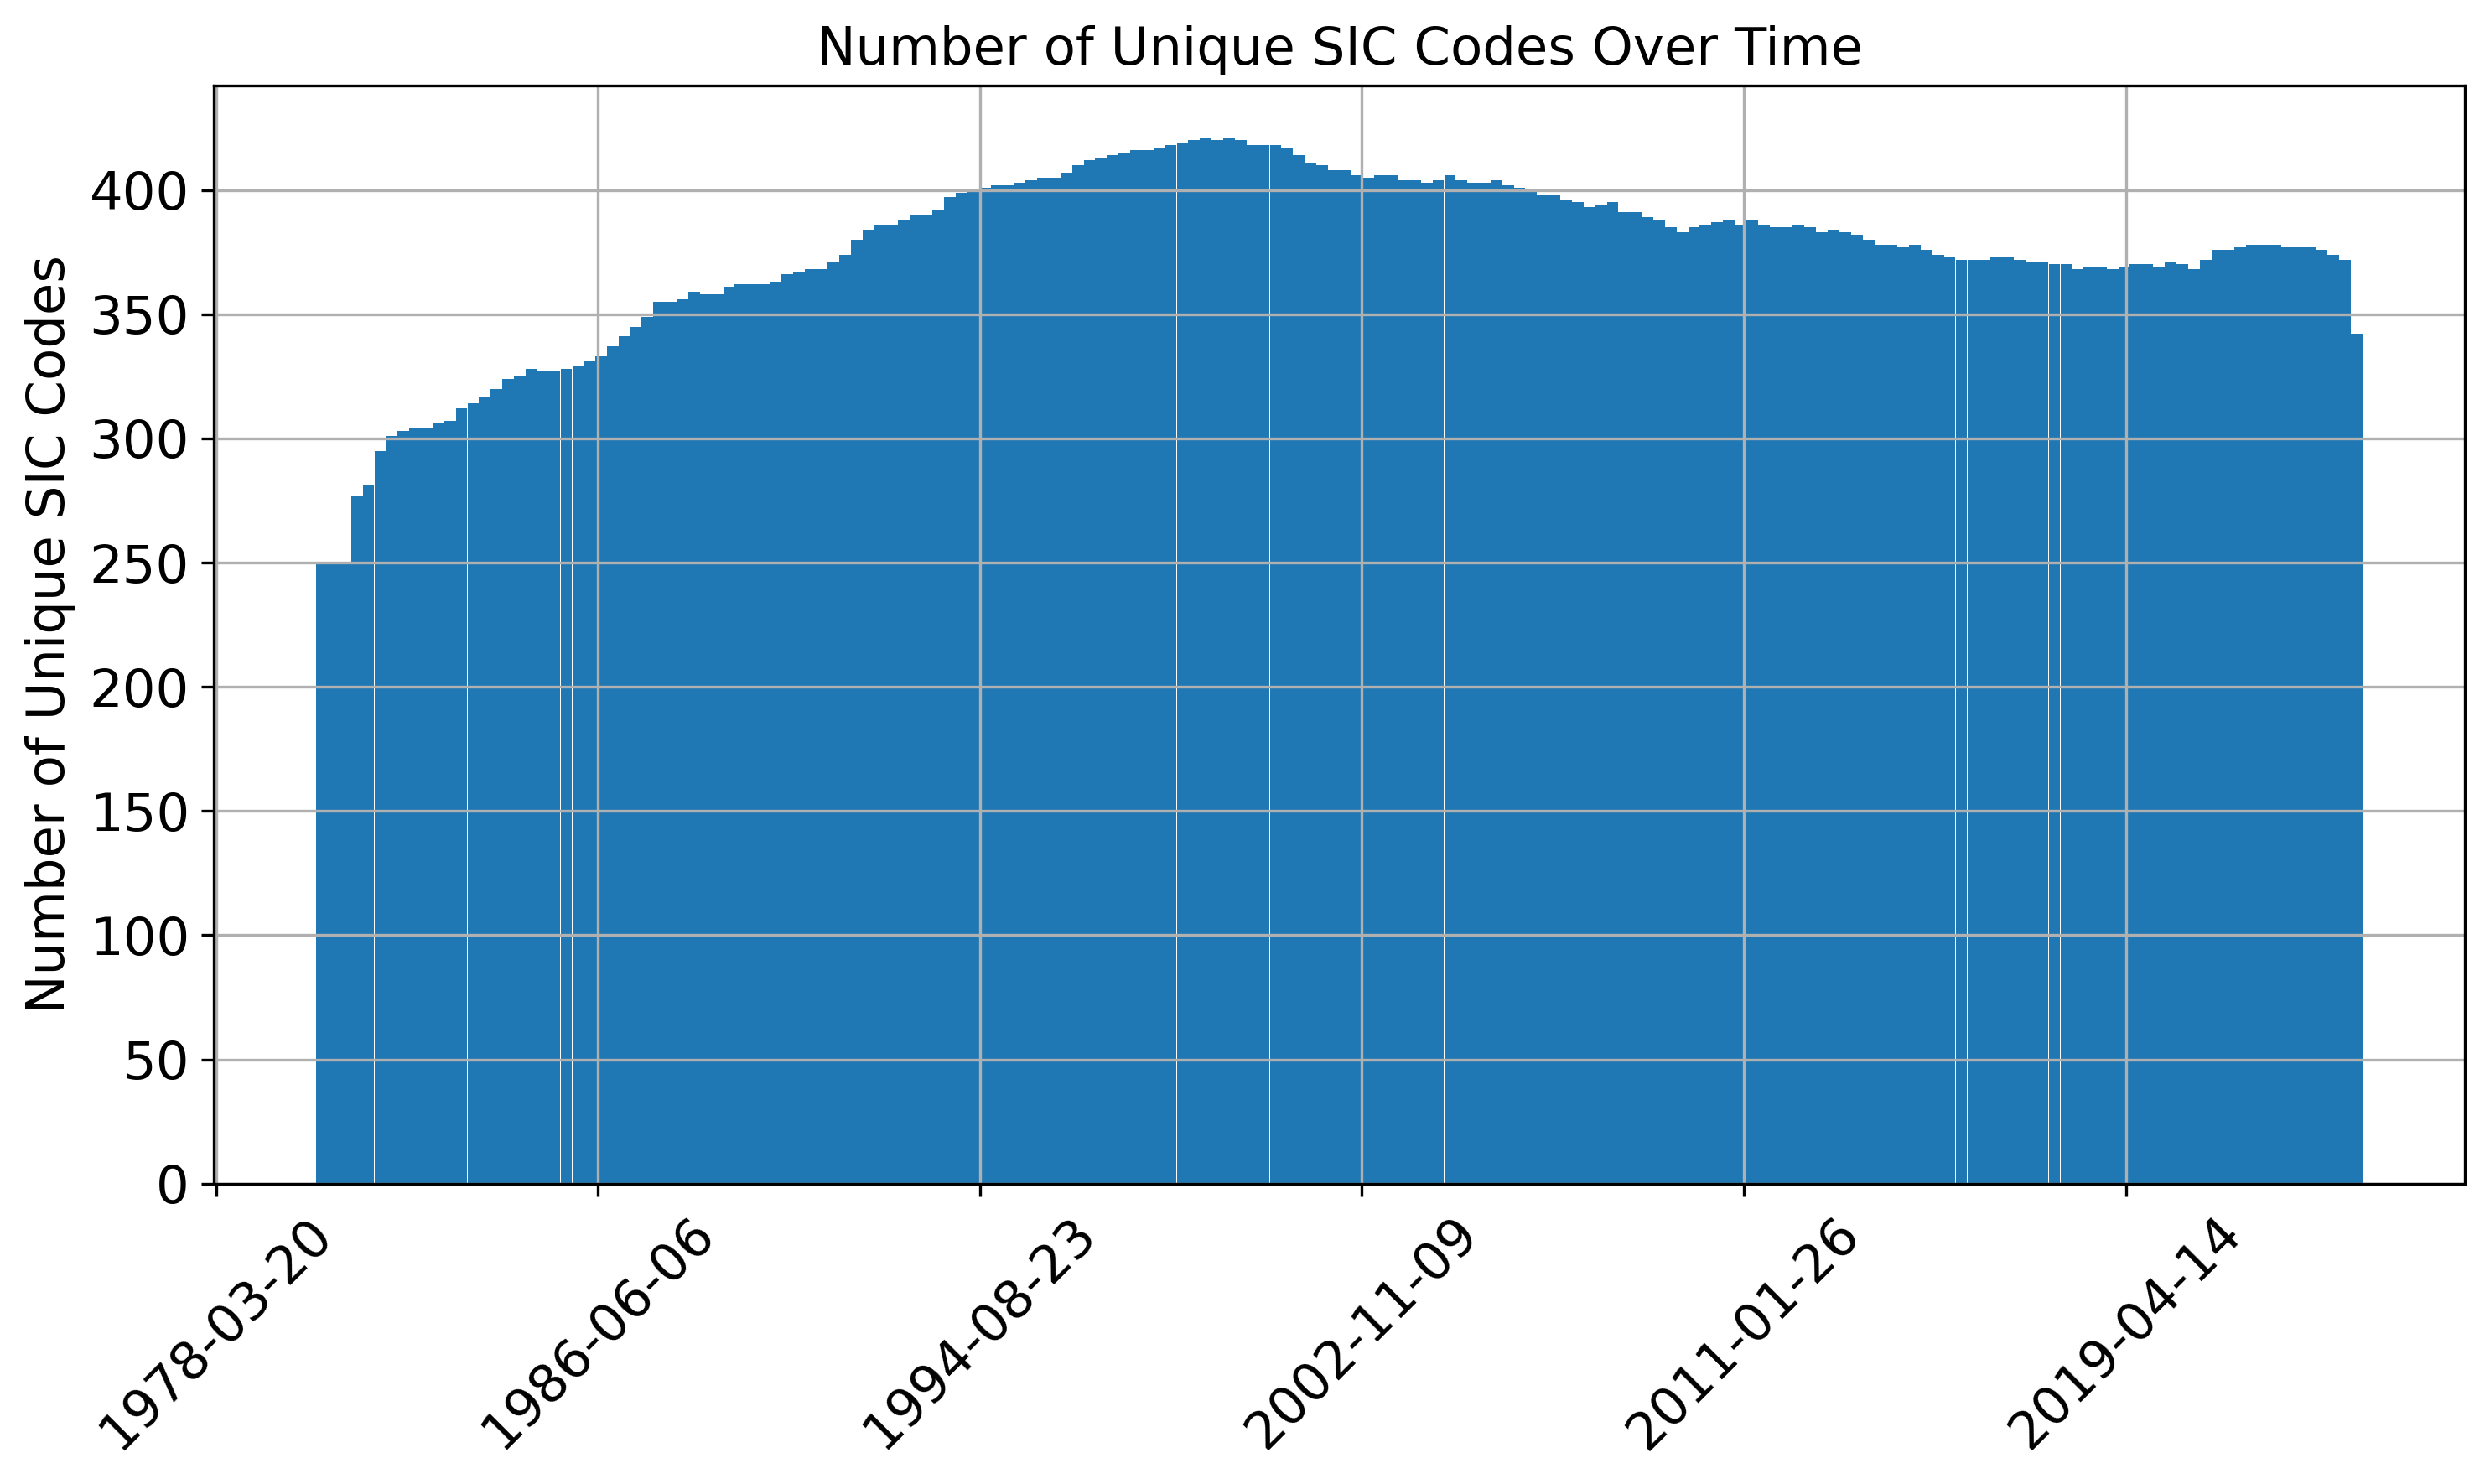

In [4]:
sic_counts = df.groupby('datadate')['sic'].nunique()
# Plot the results
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(sic_counts.index, sic_counts.values, width=91)
plt.ylabel('Number of Unique SIC Codes', size=15)
plt.title('Number of Unique SIC Codes Over Time', size=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

# Set x-axis ticks to show only every year
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(sic_counts)//25, integer=True))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# df[df["sic"]==2833]

In [6]:
offices = {}

SIC_to_industry = pd.read_csv("SIC_to_industry.csv")

for i in SIC_to_industry.columns:
    offices[i] = list(SIC_to_industry[i].dropna())

# offices[i] = list(SIC_to_industry[i].dropna()) for i in SIC_to_industry.columns

# list(SIC_to_industry["Financials"].dropna())
offices

{'Energy & Transportation': [1000.0,
  1040.0,
  1090.0,
  1220.0,
  1221.0,
  1311.0,
  1381.0,
  1382.0,
  1389.0,
  1400.0,
  2911.0,
  2950.0,
  2990.0,
  4011.0,
  4013.0,
  4100.0,
  4210.0,
  4213.0,
  4220.0,
  4231.0,
  4400.0,
  4412.0,
  4512.0,
  4513.0,
  4522.0,
  4581.0,
  4610.0,
  4700.0,
  4731.0,
  4900.0,
  4911.0,
  4922.0,
  4923.0,
  4924.0,
  4931.0,
  4932.0,
  4941.0,
  4950.0,
  4953.0,
  4955.0,
  4961.0,
  4991.0],
 'Manufacturing': [2000,
  2011,
  2013,
  2015,
  2020,
  2024,
  2030,
  2033,
  2040,
  2050,
  2052,
  2060,
  2070,
  2080,
  2082,
  2086,
  2090,
  2092,
  2100,
  2111,
  2200,
  2211,
  2221,
  2250,
  2253,
  2273,
  2300,
  2320,
  2330,
  2340,
  2390,
  2400,
  2421,
  2430,
  2451,
  2452,
  2510,
  2511,
  2520,
  2522,
  2531,
  2540,
  2590,
  2600,
  2611,
  2621,
  2631,
  2650,
  2670,
  2673,
  2711,
  2721,
  2731,
  2732,
  2741,
  2750,
  2761,
  2771,
  2780,
  2790,
  3011,
  3021,
  3050,
  3060,
  3100,
  3140,
  3211,

In [7]:
import mysql.connector

In [8]:
# Connect to MySQL database
connection = mysql.connector.connect(
    host="ubctg.con7266gcvin.us-east-2.rds.amazonaws.com",
    user="admin",
    password="ubctgquant",
    database="ubctg"
)


In [9]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the start and end dates
start_date = '2018-01-01'
end_date = '2021-01-31'

# SQL query to retrieve data from the "Volatility" table between two dates
sql_query = f"SELECT * FROM Returns WHERE Date BETWEEN '{start_date}' AND '{end_date}'"

# Execute the SQL query
cursor.execute(sql_query)

# Fetch all rows from the result set
returns_data = cursor.fetchall()

cursor.close()


# # Convert fetched data into a pandas DataFrame
# columns = [i[0] for i in cursor.description]  # Extract column names from cursor description
# volatility_df = pd.DataFrame(volatility_data, columns=columns)

# # Print the DataFrame
# volatility_df.head(1), volatility_df.tail(1)

True

In [11]:

returns_df = pd.DataFrame(returns_data, columns=[i[0] for i in cursor.description])
# Convert 'Date' column to datetime
returns_df['Date'] = pd.to_datetime(returns_df['Date'])

# Set the 'Date' column as the index
returns_df.set_index('Date', inplace=True)
returns_df

,Permno,Ticker,Returns
Date,,,
2018-01-02,10026,JJSF,-0.017454
2018-01-03,10026,JJSF,-0.009988
2018-01-04,10026,JJSF,0.013813
2018-01-05,10026,JJSF,-0.009551
2018-01-08,10026,JJSF,0.000742
...,...,...,...
2021-01-25,93436,TSLA,0.040348
2021-01-26,93436,TSLA,0.002600
2021-01-27,93436,TSLA,-0.021436


In [13]:
tickers = returns_df["Ticker"].unique()
len(tickers)

9783

In [ ]:
returns_df["Market Cap"] = 1.0
# returns_df[returns_df["Ticker"] == tickers[0]]["Market Cap"] = get_market_cap(tickers[0], start_date, end_date)["Market Cap"]

for ticker in tickers:
    try:
        if ticker == "TSLA":
            print(get_market_cap(ticker, start_date, end_date)["Market Cap"].values)
        returns_df.loc[returns_df['Ticker'] == ticker, 'Market Cap'] = get_market_cap(ticker, start_date, end_date)["Market Cap"].values
    except:
        pass

DGSE: No timezone found, symbol may be delisted
HNGR: No timezone found, symbol may be delisted
AKRX: No timezone found, symbol may be delisted
TECD: No timezone found, symbol may be delisted
AT: No timezone found, symbol may be delisted
ESBK: No timezone found, symbol may be delisted
BWINB: No price data found, symbol may be delisted (1d 2018-01-01 -> 2021-01-31)
PTVCB: No timezone found, symbol may be delisted
SIGM: No timezone found, symbol may be delisted
CY: No timezone found, symbol may be delisted
AMAG: No timezone found, symbol may be delisted
TCF: No timezone found, symbol may be delisted
NAVG: No timezone found, symbol may be delisted
TWMC: No timezone found, symbol may be delisted
KSPN: Data doesn't exist for startDate = 1514782800, endDate = 1612069200
VIVO: No timezone found, symbol may be delisted
FISV: Data doesn't exist for startDate = 1514782800, endDate = 1612069200
RWC: No price data found, symbol may be delisted (1d 2018-01-01 -> 2021-01-31)
CYTR: No timezone found,

In [14]:
returns_df["Weight"] = 1.0/len(tickers)

In [22]:
index_df = pd.DataFrame(returns_df[returns_df["Ticker"] == tickers[0]]["Returns"])


,Returns
Date,
2018-01-02,-0.017454
2018-01-03,-0.009988
2018-01-04,0.013813
2018-01-05,-0.009551
2018-01-08,0.000742
...,...
2021-01-25,0.024822
2021-01-26,0.051119
2021-01-27,-0.040204


2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-20 00:00:00
2018-02-21 00:00:00
2018-02-22 00:00:00
2018-02-23 00:00:00
2018-02-26 00:00:00
2018-02-27 00:00:00
2018-02-28 00:00:00
2018-03-01 00:00:00
2018-03-02 00:00:00
2018-03-05 00:00:00
2018-03-06 00:00:00
2018-03-07 00:00:00
2018-03-08 00:00:00
2018-03-09 00:00:00
2018-03-12 00:00:00
2018-03-13 00:00:00
2018-03-14 00:00:00


In [38]:
for date in index_df.index:
    counter = 0
    print(date)
    ticker = tickers[0]
    permno = returns_df[returns_df["Ticker"] == ticker]["Permno"][date]
    if permno not in offices["Manufacturing"]:
        index_df["Returns"][date] += returns
    index_df["Returns"][date] = index_df["Returns"][date] / counter


2018-01-02 00:00:00
no
2018-01-03 00:00:00
no
2018-01-04 00:00:00
no
2018-01-05 00:00:00
no
2018-01-08 00:00:00
no
2018-01-09 00:00:00
no
2018-01-10 00:00:00
no
2018-01-11 00:00:00
no
2018-01-12 00:00:00
no
2018-01-16 00:00:00
no
2018-01-17 00:00:00
no
2018-01-18 00:00:00
no
2018-01-19 00:00:00
no
2018-01-22 00:00:00
no
2018-01-23 00:00:00
no
2018-01-24 00:00:00


KeyboardInterrupt: 

In [40]:
for date in index_df.index:
    print(date)
    counter = 0
    for ticker in tickers:
        ticker = tickers[0]
        permno = returns_df[returns_df["Ticker"] == ticker]["Permno"][date]
        if permno not in offices["Manufacturing"]:
            returns = returns_df[returns_df["Ticker"] == ticker]["Returns"][date]
            index_df["Returns"][date] += returns
            
    index_df["Returns"][date] = index_df["Returns"][date] / counter
    

# returns_df[returns_df["Permno"] in offices["Manufacturing"]]

2018-01-02 00:00:00


/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_3265/525531813.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  index_df["Returns"][date] += returns


KeyboardInterrupt: 

In [40]:
returns_df[returns_df["Ticker"] == tickers[0]]["Market Cap"]

Date
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
              ..
2021-01-25   NaN
2021-01-26   NaN
2021-01-27   NaN
2021-01-28   NaN
2021-01-29   NaN
Name: Market Cap, Length: 775, dtype: float64

In [38]:
returns_df.loc["Ticker" == tickers[0]]

KeyError: 'False: boolean label can not be used without a boolean index'

9783

In [23]:
market_cap_data

,Close,Market Cap
Date,,
2022-01-03 00:00:00-05:00,179.481125,2.752182e+12
2022-01-04 00:00:00-05:00,177.203201,2.717252e+12
2022-01-05 00:00:00-05:00,172.489609,2.644973e+12
2022-01-06 00:00:00-05:00,169.610199,2.600820e+12
2022-01-07 00:00:00-05:00,169.777847,2.603390e+12
...,...,...
2022-12-23 00:00:00-05:00,130.782578,2.005433e+12
2022-12-27 00:00:00-05:00,128.967514,1.977601e+12
2022-12-28 00:00:00-05:00,125.010124,1.916918e+12


In [ ]:
for ticker in tickers:
    

In [19]:
import yfinance as yf
import pandas as pd
import datetime

def get_market_cap(ticker, start_date, end_date):
    # Download the historical data
    stock = yf.Ticker(ticker)
    historical_data = stock.history(start=start_date, end=end_date)

    # Get the shares outstanding (this is the latest value, yfinance does not provide historical shares outstanding)
    shares_outstanding = stock.info['sharesOutstanding']

    # Calculate market cap
    historical_data['Market Cap'] = historical_data['Close'] * shares_outstanding

    return historical_data[['Close', 'Market Cap']]

# Example usage
ticker = 'AAPL'


market_cap_data = get_market_cap(ticker, start_date, end_date)
print(market_cap_data)


AttributeError: 'numpy.ndarray' object has no attribute 'upper'

DatetimeIndex(['1980-06-30', '1980-09-30', '1980-12-31', '1981-03-31',
               '1981-06-30', '1981-09-30', '1981-12-31', '1982-03-31',
               '1982-06-30', '1982-09-30',
               ...
               '2021-12-31', '2022-03-31', '2022-06-30', '2022-09-30',
               '2022-12-31', '2023-03-31', '2023-06-30', '2023-09-30',
               '2023-12-31', '2024-03-31'],
              dtype='datetime64[ns]', name='datadate', length=176, freq=None)

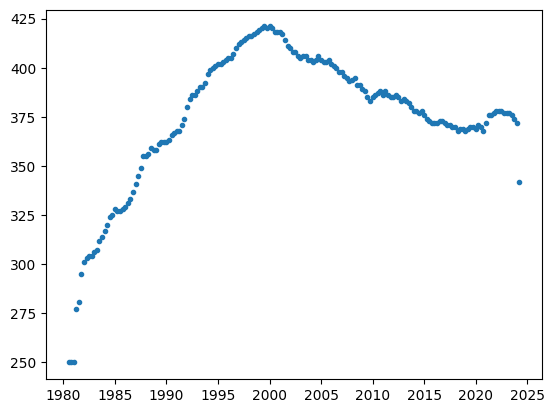

In [7]:
plt.scatter(sic_counts.index, sic_counts.values, marker='.')
sic_counts.index